### 7주차 회귀분석 (2021.3.21)
#### 데이터 전처리 

In [1]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [2]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

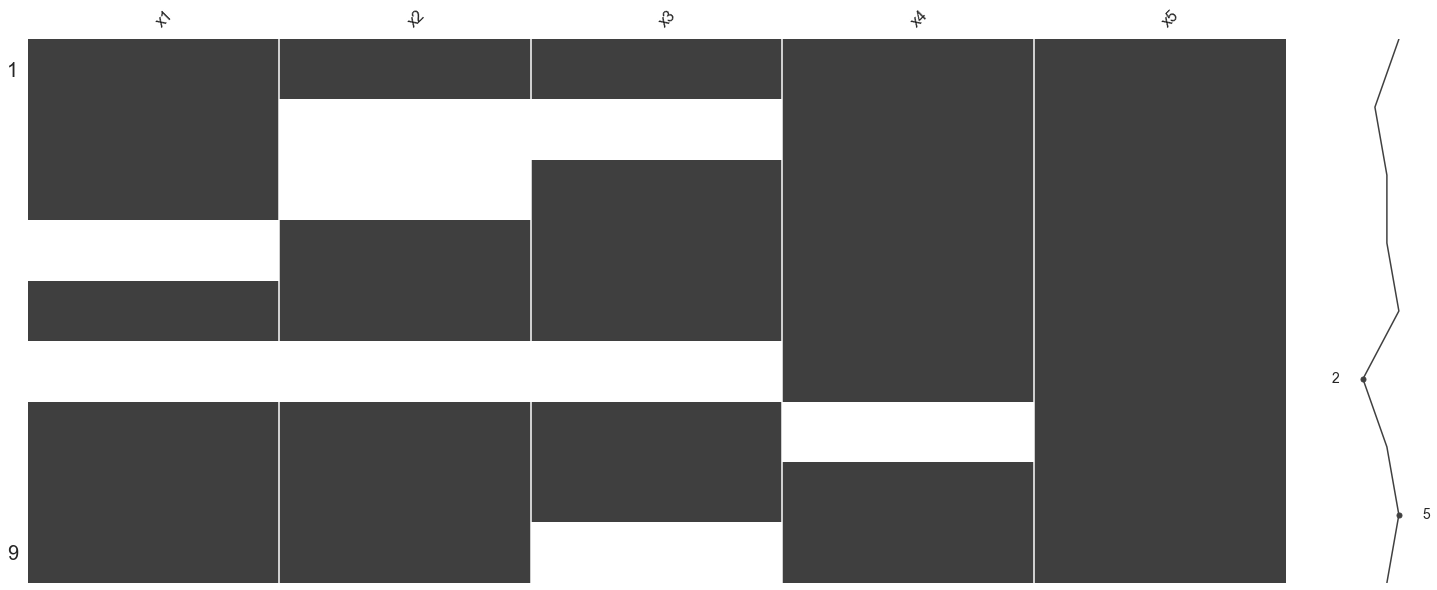

In [3]:
import missingno as msno

msno.matrix(df)
plt.show()

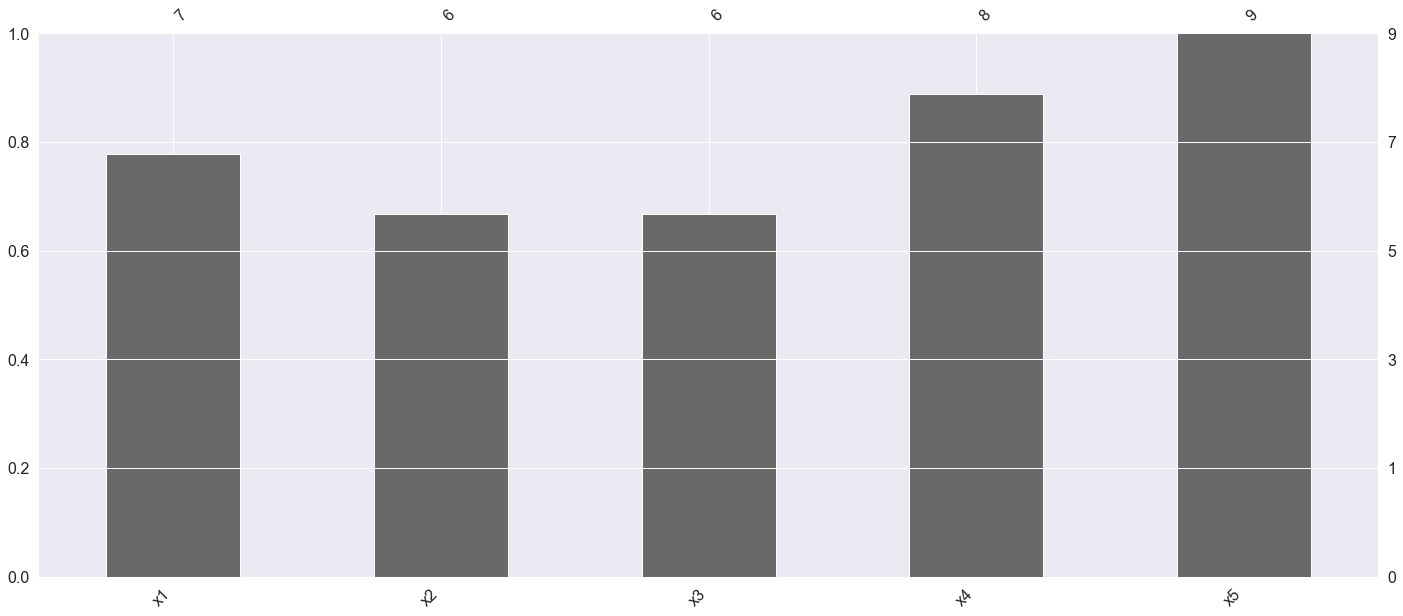

In [4]:
msno.bar(df)
plt.show()

In [5]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


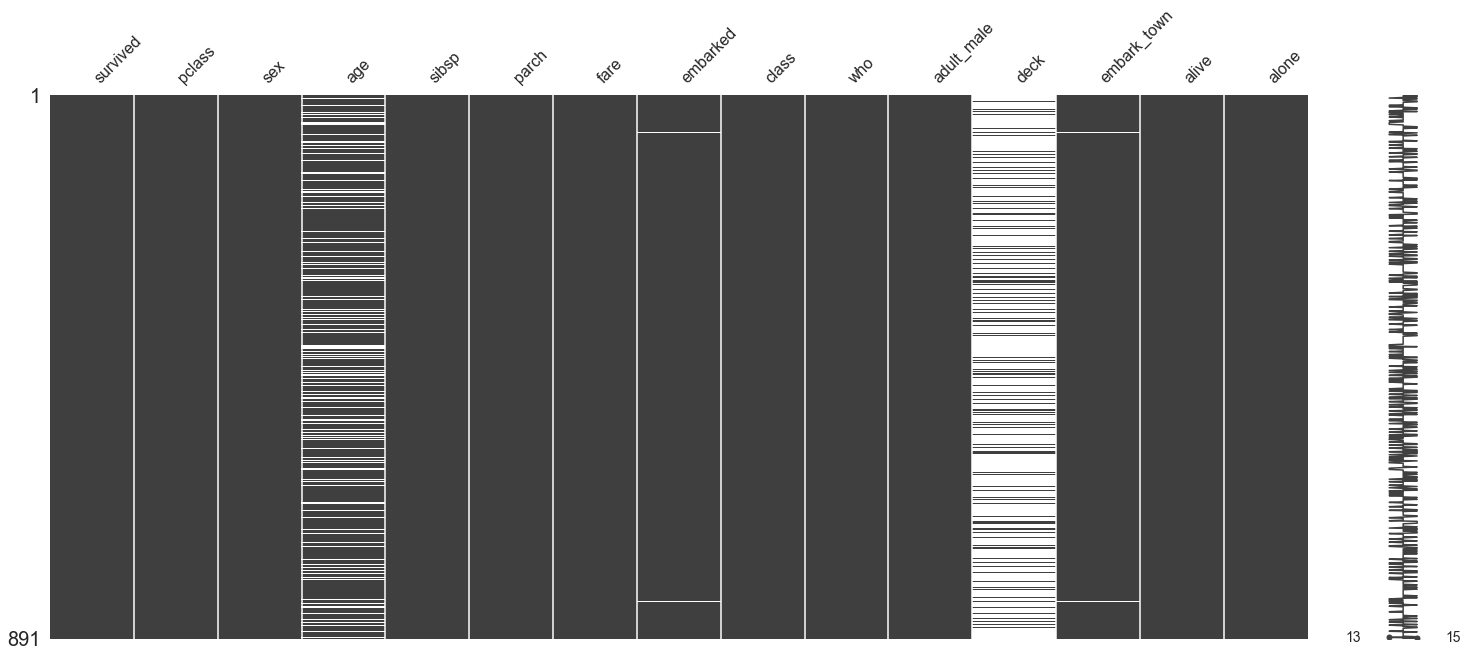

In [6]:
msno.matrix(titanic)
plt.show()

In [7]:
df.dropna(thresh = 7, axis = 1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


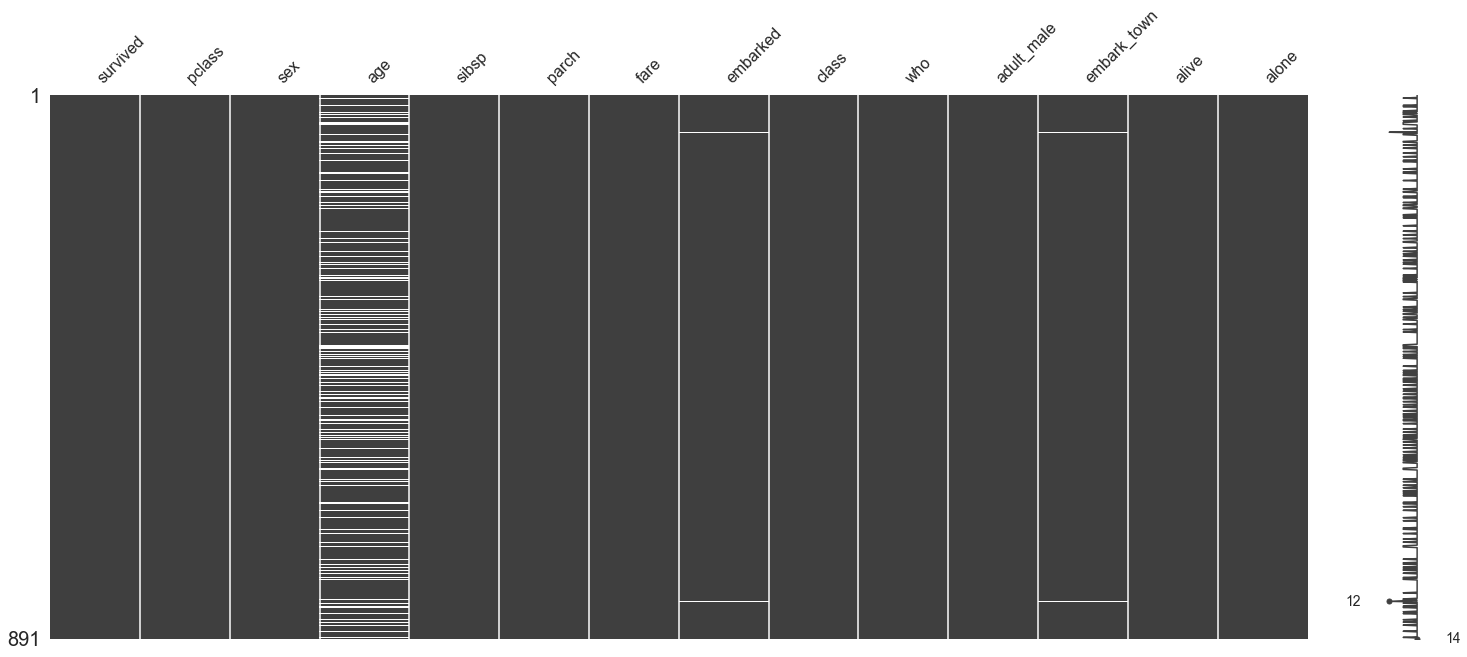

In [8]:
titanic = titanic.dropna(thresh = len(titanic) * 0.5, axis = 1)
msno.matrix(titanic)
plt.show()

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df1 = pd.DataFrame(imputer.fit_transform(df[['x1', 'x2', 'x3']]))
df1

,0,1,2
0,1.0,0.1,1.0
1,2.0,0.1,1.0
2,3.0,0.1,3.0
3,1.0,0.4,4.0
4,5.0,0.5,5.0
5,1.0,0.1,1.0
6,7.0,0.7,7.0
7,8.0,0.8,8.0
8,9.0,0.9,1.0


C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


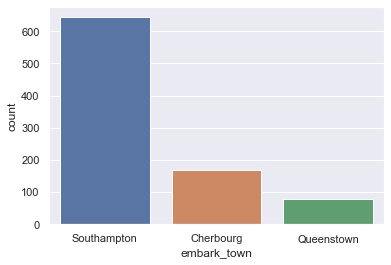

In [10]:
sns.countplot(titanic.embark_town)
plt.show()

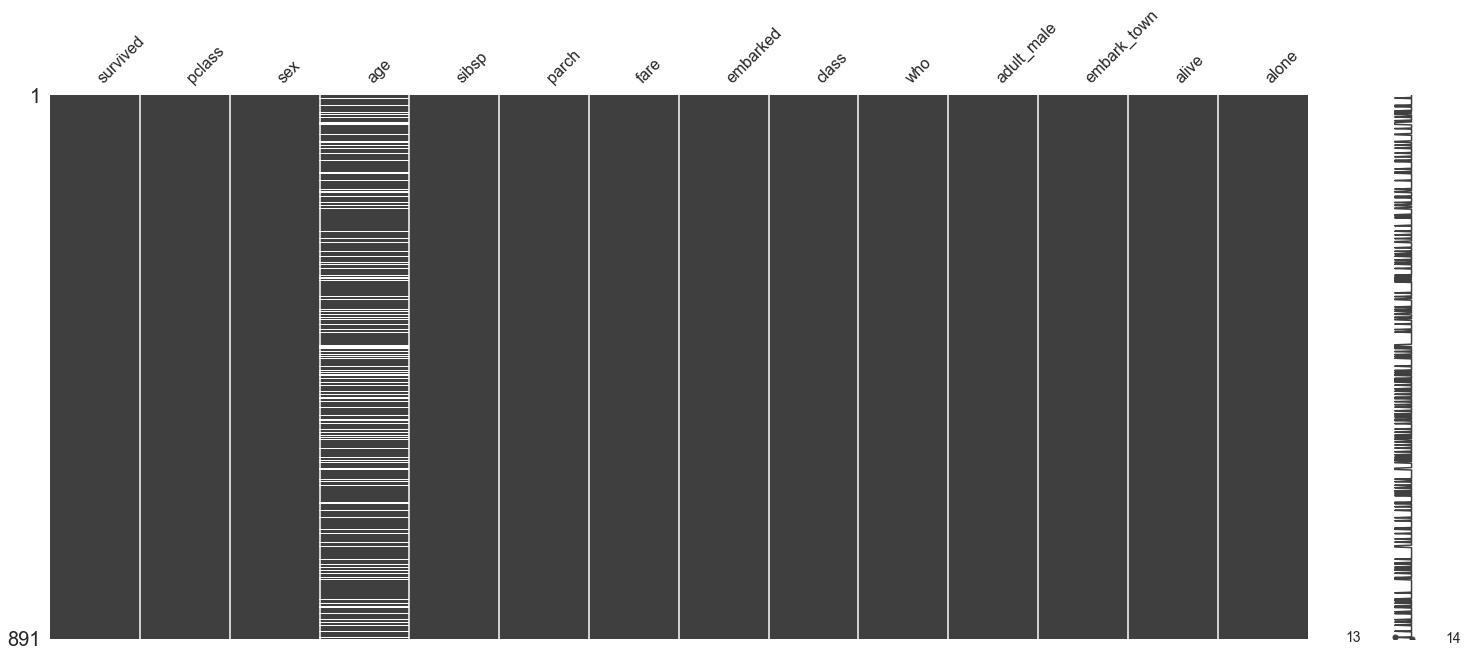

In [12]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy='most_frequent')
titanic['embark_town'] = imputer_embark_town.fit_transform(titanic[['embark_town']])
titanic['embarked'] = imputer_embark_town.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

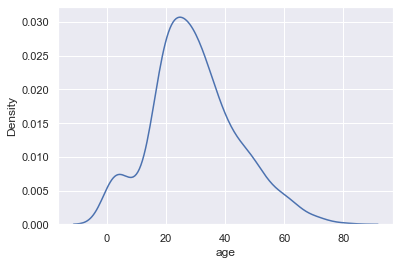

In [14]:
sns.kdeplot(titanic.age)

In [17]:
imputer_age = SimpleImputer(strategy='median')
titanic['age'] = imputer_age.fit_transform(titanic[['age']])

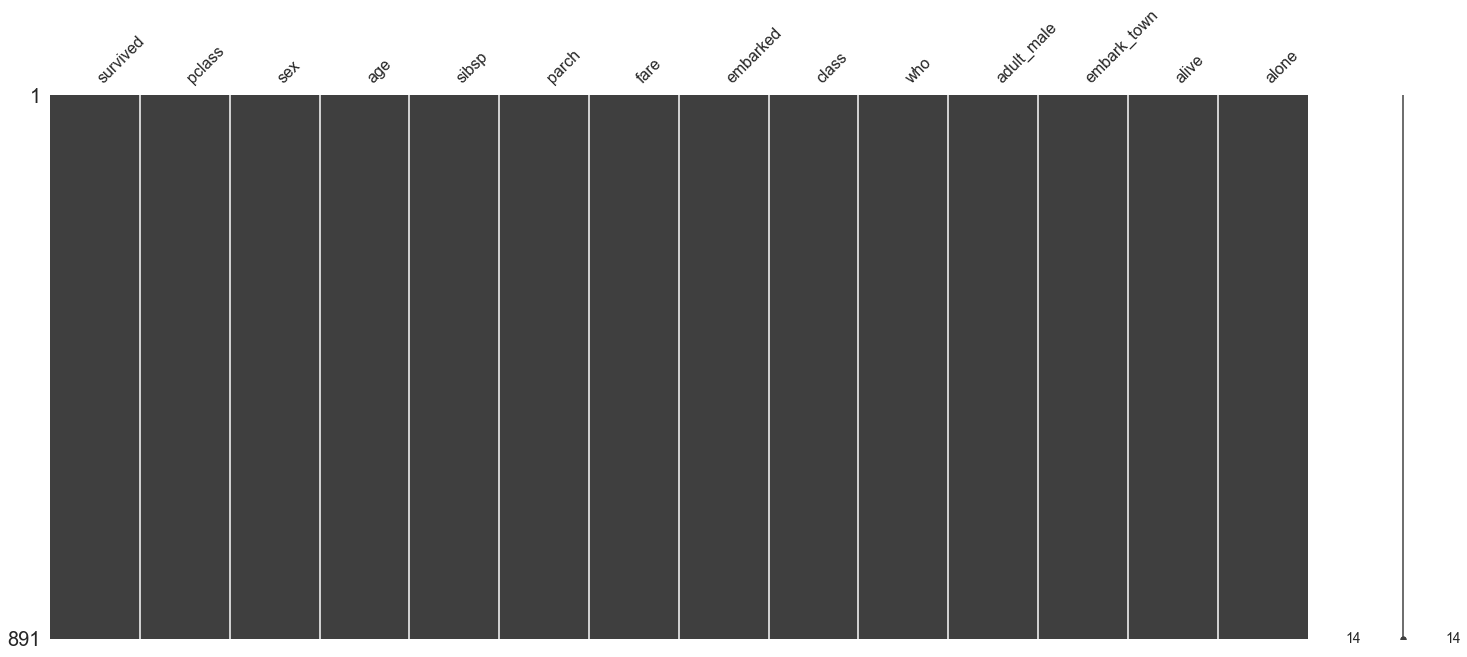

In [18]:
msno.matrix(titanic)
plt.show()

#### pasty 패키지

In [20]:
from patsy import demo_data
df = pd.DataFrame(demo_data('x1', 'x2', 'x3', 'x4', 'x5'))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [25]:
from patsy import dmatrix

dmatrix('x1 + np.log(np.abs(x2))', data = df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [27]:
dmatrix('x1 + x2 +  x1:x2 + 0', data = df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [31]:
dmatrix('x1*x2 + 0', data = df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [32]:
dmatrix('x1 + I(x1 + x2) + 0', data = df)

DesignMatrix with shape (5, 2)
       x1  I(x1 + x2)
  1.76405     0.78677
  0.40016     1.35025
  0.97874     0.82738
  2.24089     2.13767
  1.86756     2.27816
  Terms:
    'x1' (column 0)
    'I(x1 + x2)' (column 1)

In [34]:
dmatrix('center(x1) + 0', data = df)

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [35]:
df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [36]:
X = np.arange(7).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [40]:
X = 90 * np.arange(9).reshape(-1, 1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])